# 데이터 불러오기

In [1]:
# 필요한 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [2]:
data=pd.read_csv('C:\\Users\\pro_1030\\Desktop\\Marketing2\\Olist\\수요예측_전처리_SP_3.csv',encoding='cp949',
                 parse_dates=['order_purchase_timestamp',
                              'order_approved_at',
                              'order_delivered_carrier_date',
                              'order_delivered_customer_date',
                              'order_estimated_delivery_date']) # 2017.01.01-2018.08.23 데이터만 추출한거

In [3]:
# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
fontprop = fm.FontProperties(fname=font_path)

plt.rc('font', family=fontprop.get_name())

# Unicode 마이너스 설정
plt.rcParams['axes.unicode_minus'] = False

In [4]:
data.columns

Index(['order_id', 'order_status', 'customer_id', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'geolocation_lat', 'geolocation_lng', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'time_difference_0', 'time_difference_1', 'time_difference_2',
       'time_difference_total', 'cluster', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_korean'],
      dtype='object')

# 1. 클러스터별 그룹화

In [5]:
df0=data[data['cluster']==0]
df1=data[data['cluster']==1]
df2=data[data['cluster']==2]
df3=data[data['cluster']==3]
df4=data[data['cluster']==4]

# 2. 각 클러스터별 각 카테고리의 구매량 파악

In [6]:
cluster_counts = data.groupby(['product_category_name_korean', 'cluster']).size().reset_index(name='count')
pivot_df = cluster_counts.pivot(index='product_category_name_korean', columns='cluster', values='count').fillna(0)
pivot_df.columns = [f'cluster{int(col)}_count' for col in pivot_df.columns]
pivot_df.sort_values(by='cluster0_count', inplace=True, ascending=False)
pivot_df.reset_index(inplace=True)

pivot_df

,product_category_name_korean,cluster0_count,cluster1_count,cluster2_count,cluster3_count,cluster4_count
0,가구,6311,492,819,1719,402
1,가전디지털,5706,498,756,1553,440
2,화장품,3756,257,409,891,265
3,스포츠,2319,202,338,588,160
4,주방용품,2138,176,264,515,147
5,키즈,1887,139,237,497,156
6,생활용품,1509,150,210,401,128
7,공구,1484,180,216,523,157
8,차량용품,1065,111,144,287,107
9,패션,967,81,121,282,94


# 3. index : 구매 날짜로 / 열 : 날짜에 따른 각 카테고리별 구매량 

In [7]:
# order_purchase_timestamp를 datetime으로 변환
df0['order_purchase_timestamp'] = pd.to_datetime(df0['order_purchase_timestamp'])
df1['order_purchase_timestamp'] = pd.to_datetime(df1['order_purchase_timestamp'])
df2['order_purchase_timestamp'] = pd.to_datetime(df2['order_purchase_timestamp'])
df3['order_purchase_timestamp'] = pd.to_datetime(df3['order_purchase_timestamp'])
df4['order_purchase_timestamp'] = pd.to_datetime(df4['order_purchase_timestamp'])
# 시간 부분을 제거하고 날짜만 남김
df0['order_purchase_date'] = df0['order_purchase_timestamp'].dt.date
df1['order_purchase_date'] = df1['order_purchase_timestamp'].dt.date
df2['order_purchase_date'] = df2['order_purchase_timestamp'].dt.date
df3['order_purchase_date'] = df3['order_purchase_timestamp'].dt.date
df4['order_purchase_date'] = df4['order_purchase_timestamp'].dt.date
# 각 날짜별 카테고리별 행 개수를 세기
data_0 = df0.groupby(['order_purchase_date', 'product_category_name_korean']).size().unstack(fill_value=0)
data_1 = df1.groupby(['order_purchase_date', 'product_category_name_korean']).size().unstack(fill_value=0)
data_2 = df2.groupby(['order_purchase_date', 'product_category_name_korean']).size().unstack(fill_value=0)
data_3 = df3.groupby(['order_purchase_date', 'product_category_name_korean']).size().unstack(fill_value=0)
data_4 = df4.groupby(['order_purchase_date', 'product_category_name_korean']).size().unstack(fill_value=0)
# 인덱스와 열을 재설정
data_0.index.name = 'order_purchase_date'
data_0.columns.name = 'product_category_name_korean'
data_1.index.name = 'order_purchase_date'
data_1.columns.name = 'product_category_name_korean'
data_2.index.name = 'order_purchase_date'
data_2.columns.name = 'product_category_name_korean'
data_3.index.name = 'order_purchase_date'
data_3.columns.name = 'product_category_name_korean'
data_4.index.name = 'order_purchase_date'
data_4.columns.name = 'product_category_name_korean'


C:\Users\pro_1030\AppData\Local\Temp\ipykernel_14620\1465793399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['order_purchase_timestamp'] = pd.to_datetime(df0['order_purchase_timestamp'])
C:\Users\pro_1030\AppData\Local\Temp\ipykernel_14620\1465793399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['order_purchase_timestamp'] = pd.to_datetime(df1['order_purchase_timestamp'])
C:\Users\pro_1030\AppData\Local\Temp\ipykernel_14620\1465793399.py:4: SettingWithCopyWarning: 
A value is trying to 

In [8]:
data_0

product_category_name_korean,가구,가전디지털,공구,기타,도서,문구,반려동물용품,보안용품,생활용품,스포츠,알수없음,예술,음식,음악,주방용품,차량용품,키즈,패션,화장품
order_purchase_date,,,,,,,,,,,,,,,,,,,
2017-01-07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-01-11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2017-01-12,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2017-01-13,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2017-01-14,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-19,21,11,5,0,1,2,1,0,1,3,1,0,4,1,13,0,6,2,11
2018-08-20,21,9,15,4,1,3,3,0,1,5,0,0,5,0,5,4,4,3,14
2018-08-21,21,12,4,1,2,3,1,1,4,17,0,0,3,1,12,3,6,1,15


# 4. 블랙프라이데이 더미 변수 추가

In [9]:
# 블랙프라이데이 날짜 설정
black_friday_date = '2017-11-24'

# 각 pivot_table에 블랙프라이데이 더미 변수 추가
for i, data_ in enumerate([data_0, data_1, data_2, data_3, data_4]):
    # 블랙프라이데이 컬럼 생성, 해당 날짜는 1, 그 외는 0으로 세팅
    data_['black_friday'] = (data_.index == pd.to_datetime(black_friday_date)).astype(int)
    
    # 결과 확인
    print(f"data_{i} (블랙프라이데이 추가):")
    print(data_.head(), '\n')


data_0 (블랙프라이데이 추가):
product_category_name_korean  가구  가전디지털  공구  기타  도서  문구  반려동물용품  보안용품  생활용품  \
order_purchase_date                                                           
2017-01-07                     1      0   0   0   0   0       0     0     0   
2017-01-11                     1      0   0   0   0   0       0     0     0   
2017-01-12                     2      1   0   0   0   0       0     0     0   
2017-01-13                     1      0   1   0   0   0       0     0     0   
2017-01-14                     3      1   0   0   0   0       0     0     0   

product_category_name_korean  스포츠  알수없음  예술  음식  음악  주방용품  차량용품  키즈  패션  화장품  \
order_purchase_date                                                            
2017-01-07                      0     0   0   0   0     0     0   0   0    0   
2017-01-11                      0     0   0   0   0     0     0   1   0    0   
2017-01-12                      0     0   0   0   0     1     0   0   0    0   
2017-01-13               

# 5. train-test : 2017.06.01을 기준으로 분리

In [10]:
data_0

product_category_name_korean,가구,가전디지털,공구,기타,도서,문구,반려동물용품,보안용품,생활용품,스포츠,알수없음,예술,음식,음악,주방용품,차량용품,키즈,패션,화장품,black_friday
order_purchase_date,,,,,,,,,,,,,,,,,,,,
2017-01-07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-01-11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2017-01-12,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2017-01-13,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
2017-01-14,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-19,21,11,5,0,1,2,1,0,1,3,1,0,4,1,13,0,6,2,11,0
2018-08-20,21,9,15,4,1,3,3,0,1,5,0,0,5,0,5,4,4,3,14,0
2018-08-21,21,12,4,1,2,3,1,1,4,17,0,0,3,1,12,3,6,1,15,0


In [11]:
import pandas as pd
from datetime import datetime

# 날짜를 datetime 형식으로 변환
train_start_date = pd.to_datetime('2017-01-01')
train_end_date = pd.to_datetime('2018-05-31')
test_start_date = pd.to_datetime('2018-06-01')
test_end_date = pd.to_datetime('2018-08-23')

# 인덱스를 datetime 형식으로 변환
data_0.index = pd.to_datetime(data_0.index)
data_1.index = pd.to_datetime(data_1.index)
data_2.index = pd.to_datetime(data_2.index)
data_3.index = pd.to_datetime(data_3.index)
data_4.index = pd.to_datetime(data_4.index)

# 각 pivot_table을 train과 test로 분리
train_data_0 = data_0.loc[train_start_date:train_end_date]
test_data_0 = data_0.loc[test_start_date:test_end_date]

train_data_1 = data_1.loc[train_start_date:train_end_date]
test_data_1 = data_1.loc[test_start_date:test_end_date]

train_data_2 = data_2.loc[train_start_date:train_end_date]
test_data_2 = data_2.loc[test_start_date:test_end_date]

train_data_3 = data_3.loc[train_start_date:train_end_date]
test_data_3 = data_3.loc[test_start_date:test_end_date]

train_data_4 = data_4.loc[train_start_date:train_end_date]
test_data_4 = data_4.loc[test_start_date:test_end_date]

# 분리된 결과 확인
print("train_data_0:\n", train_data_0.head())
print("\ntest_data_0:\n", test_data_0.head())
print("\ntrain_data_1:\n", train_data_1.head())
print("\ntest_data_1:\n", test_data_1.head())
print("\ntrain_data_2:\n", train_data_2.head())
print("\ntest_data_2:\n", test_data_2.head())
print("\ntrain_data_3:\n", train_data_3.head())
print("\ntest_data_3:\n", test_data_3.head())
print("\ntrain_data_4:\n", train_data_4.head())
print("\ntest_data_4:\n", test_data_4.head())



train_data_0:
 product_category_name_korean  가구  가전디지털  공구  기타  도서  문구  반려동물용품  보안용품  생활용품  \
order_purchase_date                                                           
2017-01-07                     1      0   0   0   0   0       0     0     0   
2017-01-11                     1      0   0   0   0   0       0     0     0   
2017-01-12                     2      1   0   0   0   0       0     0     0   
2017-01-13                     1      0   1   0   0   0       0     0     0   
2017-01-14                     3      1   0   0   0   0       0     0     0   

product_category_name_korean  스포츠  알수없음  예술  음식  음악  주방용품  차량용품  키즈  패션  화장품  \
order_purchase_date                                                            
2017-01-07                      0     0   0   0   0     0     0   0   0    0   
2017-01-11                      0     0   0   0   0     0     0   1   0    0   
2017-01-12                      0     0   0   0   0     1     0   0   0    0   
2017-01-13                     

# 6. Prophet 모델 

## cluster0

In [12]:
# 각 카테고리별 주문 수 합계 계산
category_sums = train_data_0.drop(columns=['black_friday']).sum()

# 주문 수가 100개 이상인 카테고리 필터링
categories_to_forecast = category_sums[category_sums >= 100].index.tolist()

# 결과 확인
print("주문 수가 100개 이상인 카테고리:")
print(categories_to_forecast)

주문 수가 100개 이상인 카테고리:
['가구', '가전디지털', '공구', '기타', '도서', '문구', '반려동물용품', '생활용품', '스포츠', '알수없음', '음식', '음악', '주방용품', '차량용품', '키즈', '패션', '화장품']


c:\Users\pro_1030\Desktop\Marketing2\venv_marketing2024\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
C:\Users\pro_1030\AppData\Local\Temp\ipykernel_14620\1998675734.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['black_friday'].fillna(0, inplace=True)  # 결측치를 0으로 채움
19:46:15 - cmds

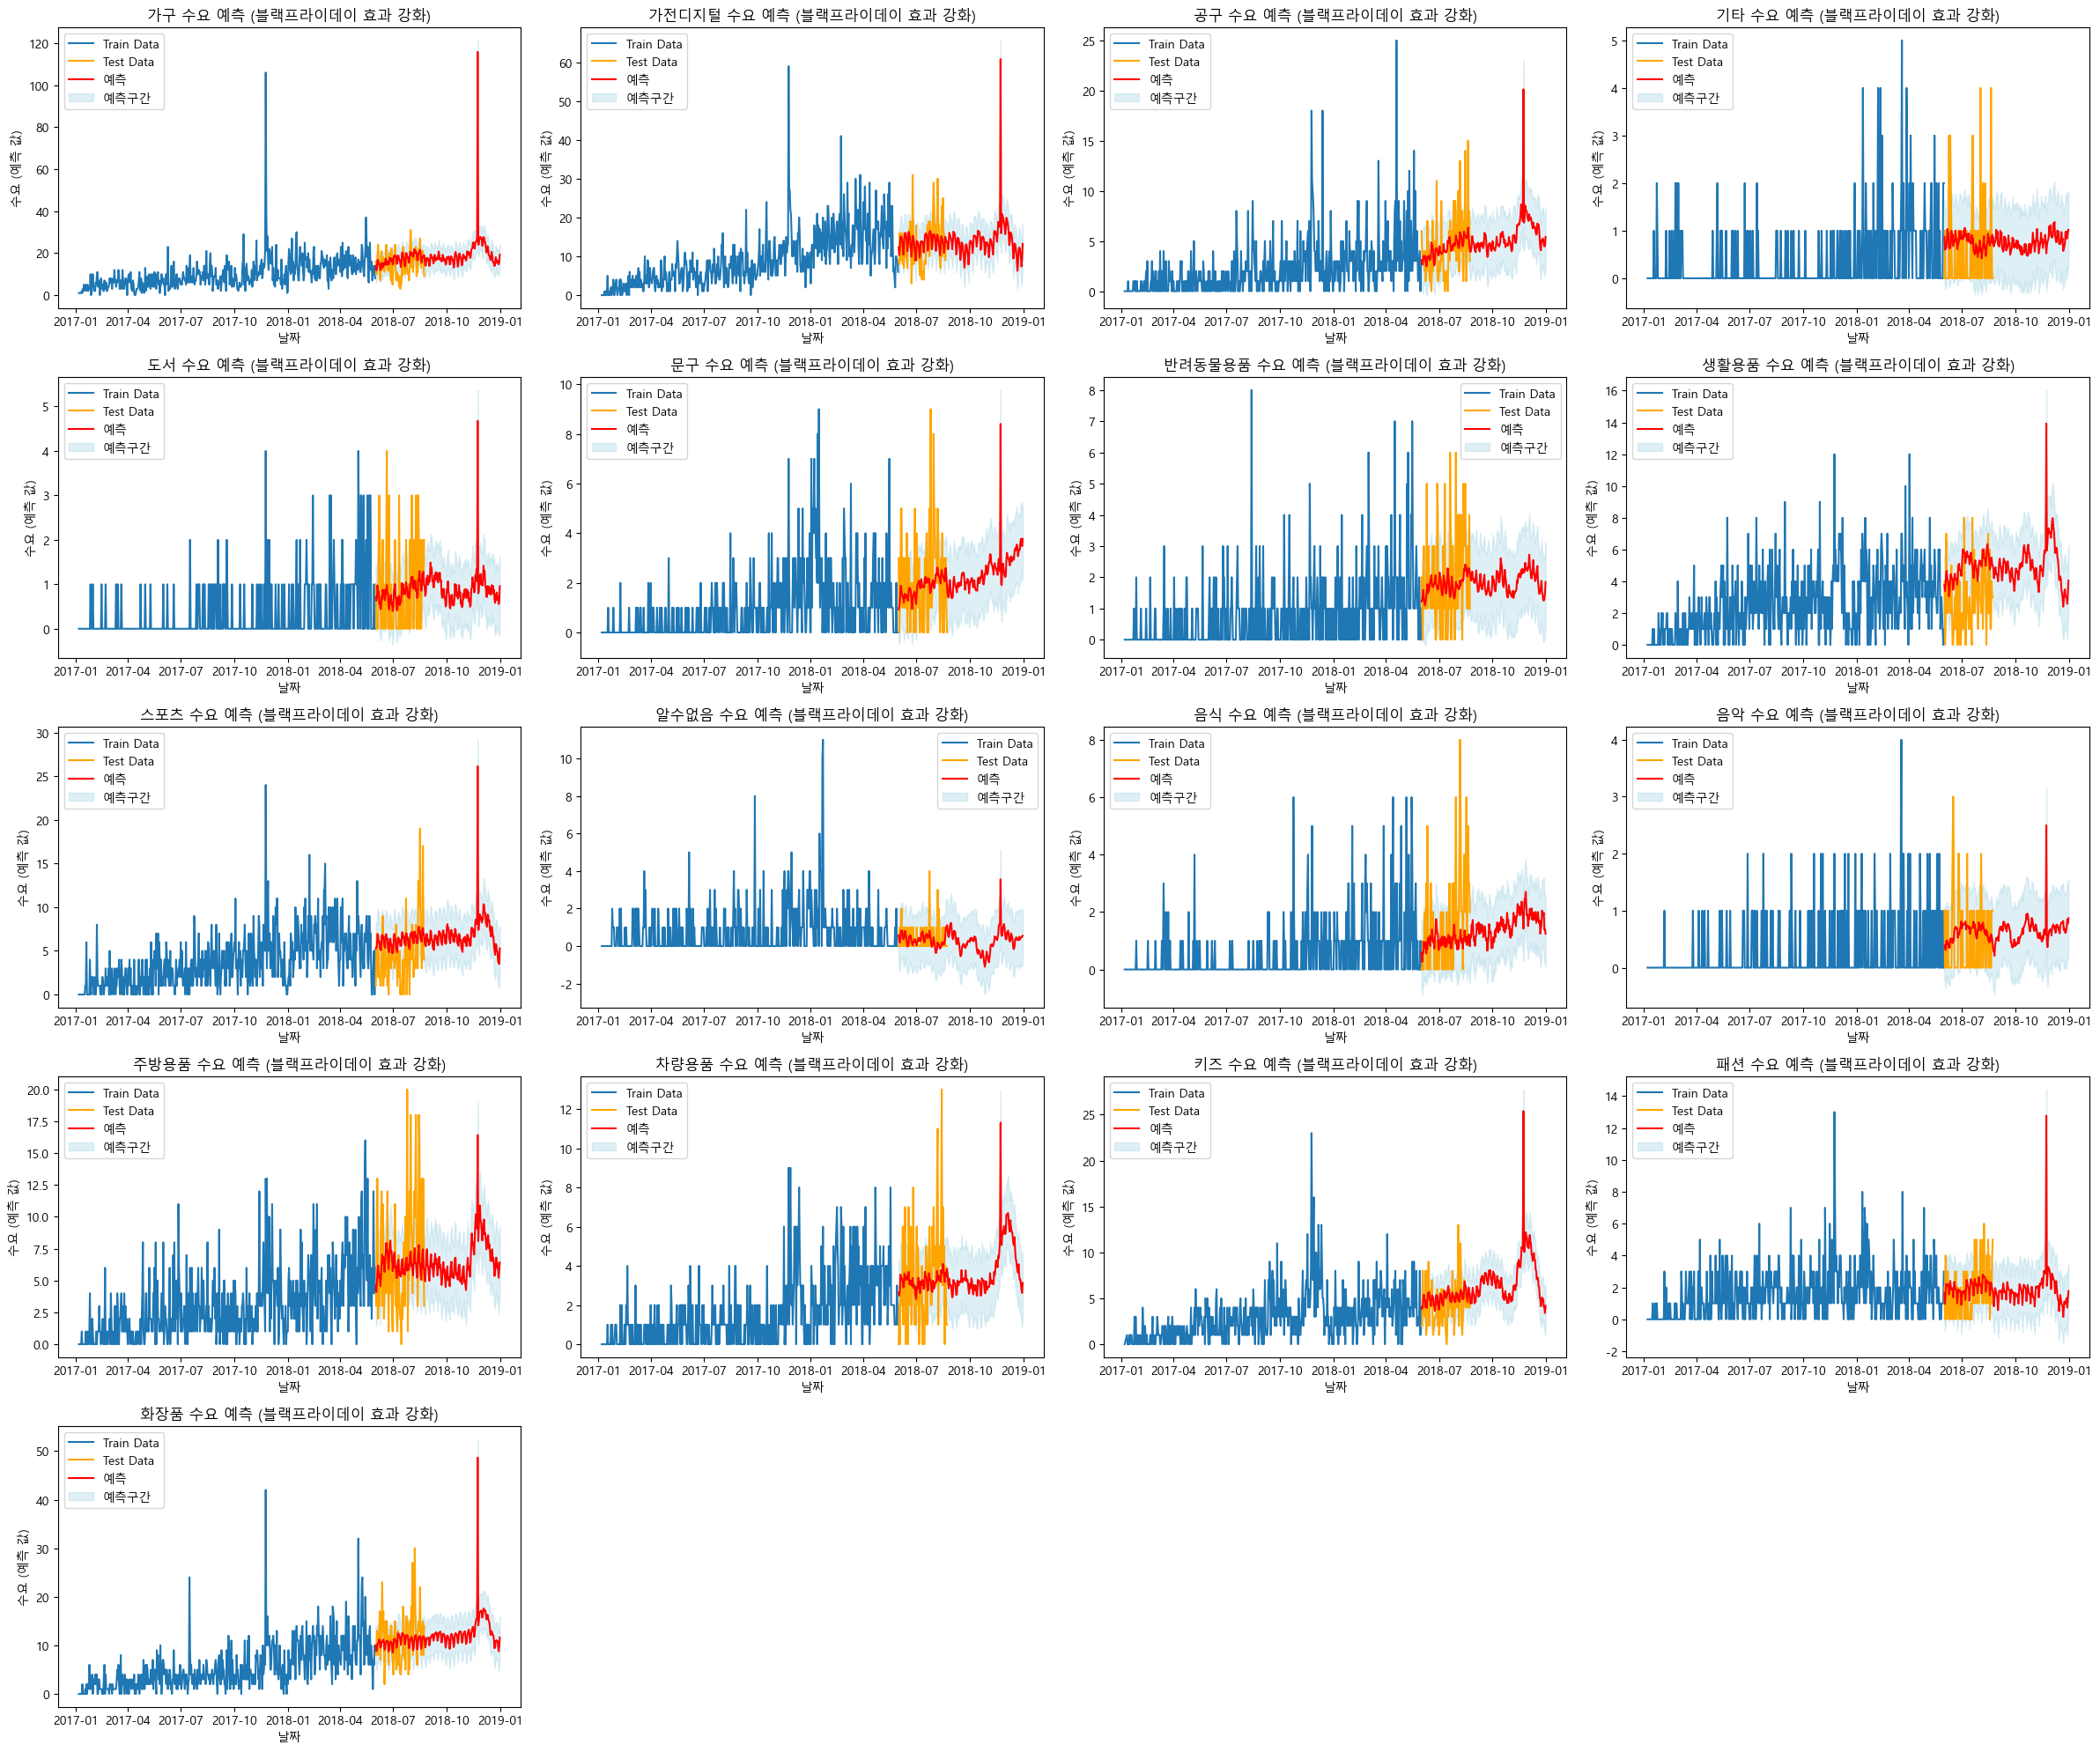

In [13]:
import matplotlib.pyplot as plt
from prophet import Prophet
import math

# Prophet 모델을 사용한 수요 예측 및 시각화 함수 정의
def forecast_with_prophet(train_data, test_data, category):
    # train 데이터 준비
    train_df = train_data[[category, 'black_friday']].reset_index()
    train_df.columns = ['ds', 'y', 'black_friday']  # Prophet이 요구하는 열 이름으로 변경

    # test 데이터 준비
    test_df = test_data[[category, 'black_friday']].reset_index()
    test_df.columns = ['ds', 'y', 'black_friday']  # Prophet이 요구하는 열 이름으로 변경
    test_df['black_friday'].fillna(0, inplace=True)  # 결측치를 0으로 채움

    # 블랙프라이데이 주변 며칠에 추가 가중치 부여 (블랙프라이데이 효과 강화)
    black_friday_dates = ['2017-11-24', '2018-11-23']
    train_df['black_friday'] = train_df['ds'].apply(lambda x: 5 if x.strftime('%Y-%m-%d') in black_friday_dates else 0)

    # Prophet 모델 설정 및 학습
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        changepoint_prior_scale=0.05,  # 변화점 민감도 강화
        seasonality_prior_scale=20     # 계절성 반영 강화
    )
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)  # 월별 계절성 추가
    model.add_regressor('black_friday', standardize=False)  # 블랙프라이데이 변수 추가 (표준화 없이 추가)

    # 모델 학습
    model.fit(train_df)

    # 2018년 12월 31일까지 예측을 위한 미래 데이터프레임 생성
    end_date = pd.to_datetime('2018-12-31')
    future_dates = model.make_future_dataframe(periods=(end_date - train_df['ds'].max()).days, freq='D')
    future_dates['black_friday'] = future_dates['ds'].apply(lambda x: 5 if x.strftime('%Y-%m-%d') in black_friday_dates else 0)

    # 예측 수행
    forecast = model.predict(future_dates)
    
    # test 데이터와 예측 구간을 반환
    forecast = forecast.set_index('ds')
    forecast_period = forecast.loc[test_df['ds'].min():end_date]
    
    return test_df, forecast_period[['yhat', 'yhat_lower', 'yhat_upper']]

# 시각화를 위한 설정
n_categories = len(categories_to_forecast)
n_rows = math.ceil(n_categories / 4)  # 4열로 구성할 때 필요한 행 개수 계산

plt.figure(figsize=(24, n_rows * 4))  # 그래프 크기 조정

# 각 카테고리에 대해 예측 수행 및 시각화
for i, category in enumerate(categories_to_forecast):
    test_df, forecast_results = forecast_with_prophet(train_data_0, test_data_0, category)
    
    # 시각화 (4열로 배치)
    plt.subplot(n_rows, 4, i + 1)
    plt.plot(train_data_0.index, train_data_0[category], label='Train Data')
    plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')
    plt.plot(forecast_results.index, forecast_results['yhat'], label='예측', color='red')
    plt.fill_between(forecast_results.index, forecast_results['yhat_lower'], forecast_results['yhat_upper'], color='lightblue', alpha=0.4, label='예측구간')
    plt.title(f"{category} 수요 예측 (블랙프라이데이 효과 강화)")
    plt.xlabel("날짜")
    plt.ylabel("수요 (예측 값)")
    plt.legend()

plt.tight_layout()
plt.show()


## cluster1

In [15]:
# 각 카테고리별 주문 수 합계 계산
category_sums = train_data_1.drop(columns=['black_friday']).sum()

# 주문 수가 100개 이상인 카테고리 필터링
categories_to_forecast = category_sums[category_sums >= 100].index.tolist()

# 결과 확인
print("주문 수가 100개 이상인 카테고리:")
print(categories_to_forecast)

주문 수가 100개 이상인 카테고리:
['가구', '가전디지털', '공구', '생활용품', '스포츠', '주방용품', '키즈', '화장품']


C:\Users\pro_1030\AppData\Local\Temp\ipykernel_14620\1998675734.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['black_friday'].fillna(0, inplace=True)  # 결측치를 0으로 채움
19:46:50 - cmdstanpy - INFO - Chain [1] start processing
19:46:50 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\pro_1030\AppData\Local\Temp\ipykernel_14620\1998675734.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0

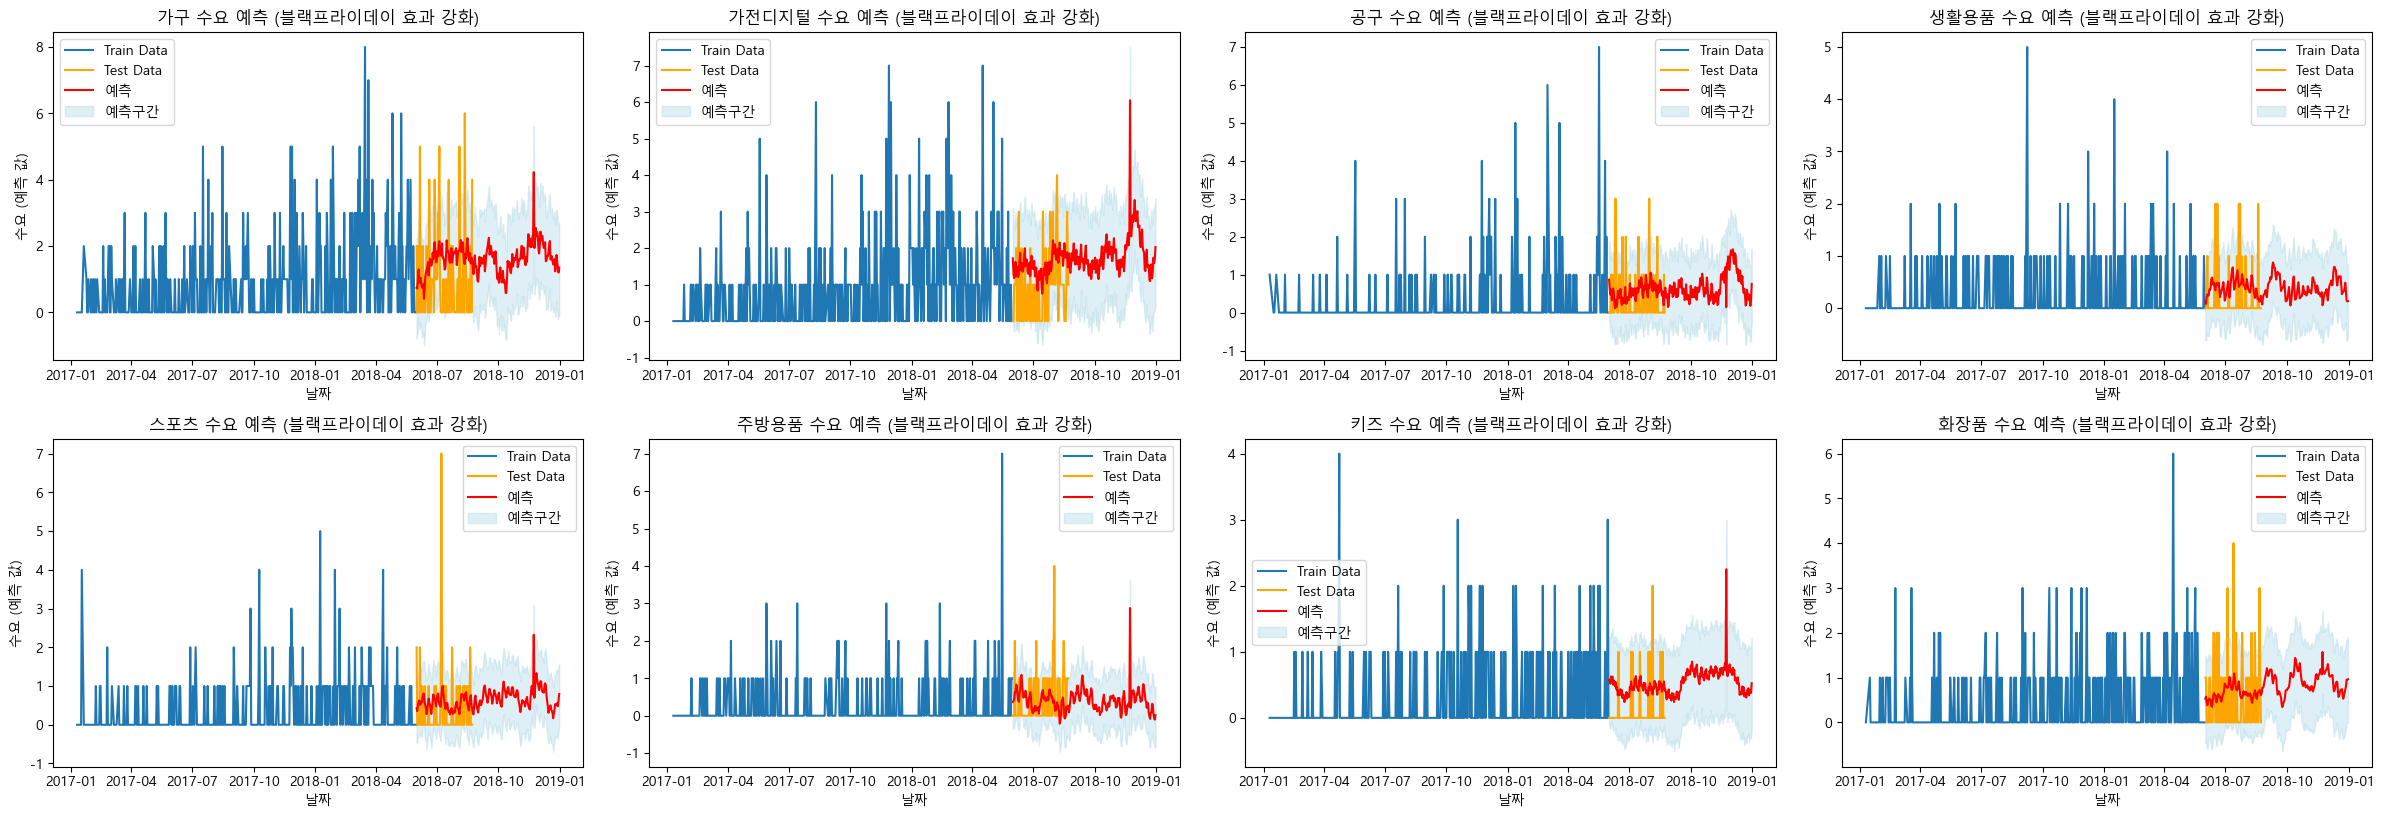

In [16]:
# 시각화를 위한 설정
n_categories = len(categories_to_forecast)
n_rows = math.ceil(n_categories / 2)  #2열로 구성할 때 필요한 행 개수 계산

plt.figure(figsize=(24, n_rows * 4))  # 그래프 크기 조정

# 각 카테고리에 대해 예측 수행 및 시각화
for i, category in enumerate(categories_to_forecast):
    test_df, forecast_results = forecast_with_prophet(train_data_1, test_data_1, category)
    
    # 시각화 (4열로 배치)
    plt.subplot(n_rows, 4, i + 1)
    plt.plot(train_data_1.index, train_data_1[category], label='Train Data')
    plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')
    
    plt.plot(forecast_results.index, forecast_results['yhat'], label='예측', color='red')
    plt.fill_between(forecast_results.index, forecast_results['yhat_lower'], forecast_results['yhat_upper'], color='lightblue', alpha=0.4, label='예측구간')
    plt.title(f"{category} 수요 예측 (블랙프라이데이 효과 강화)")
    plt.xlabel("날짜")
    plt.ylabel("수요 (예측 값)")
    plt.legend()

plt.tight_layout()
plt.show()

## cluster2

In [17]:
# 각 카테고리별 주문 수 합계 계산
category_sums = train_data_2.drop(columns=['black_friday']).sum()

# 주문 수가 100개 이상인 카테고리 필터링
categories_to_forecast = category_sums[category_sums >= 100].index.tolist()

# 결과 확인
print("주문 수가 100개 이상인 카테고리:")
print(categories_to_forecast)

주문 수가 100개 이상인 카테고리:
['가구', '가전디지털', '공구', '생활용품', '스포츠', '주방용품', '차량용품', '키즈', '화장품']


C:\Users\pro_1030\AppData\Local\Temp\ipykernel_14620\1998675734.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['black_friday'].fillna(0, inplace=True)  # 결측치를 0으로 채움
19:47:02 - cmdstanpy - INFO - Chain [1] start processing
19:47:02 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\pro_1030\AppData\Local\Temp\ipykernel_14620\1998675734.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0

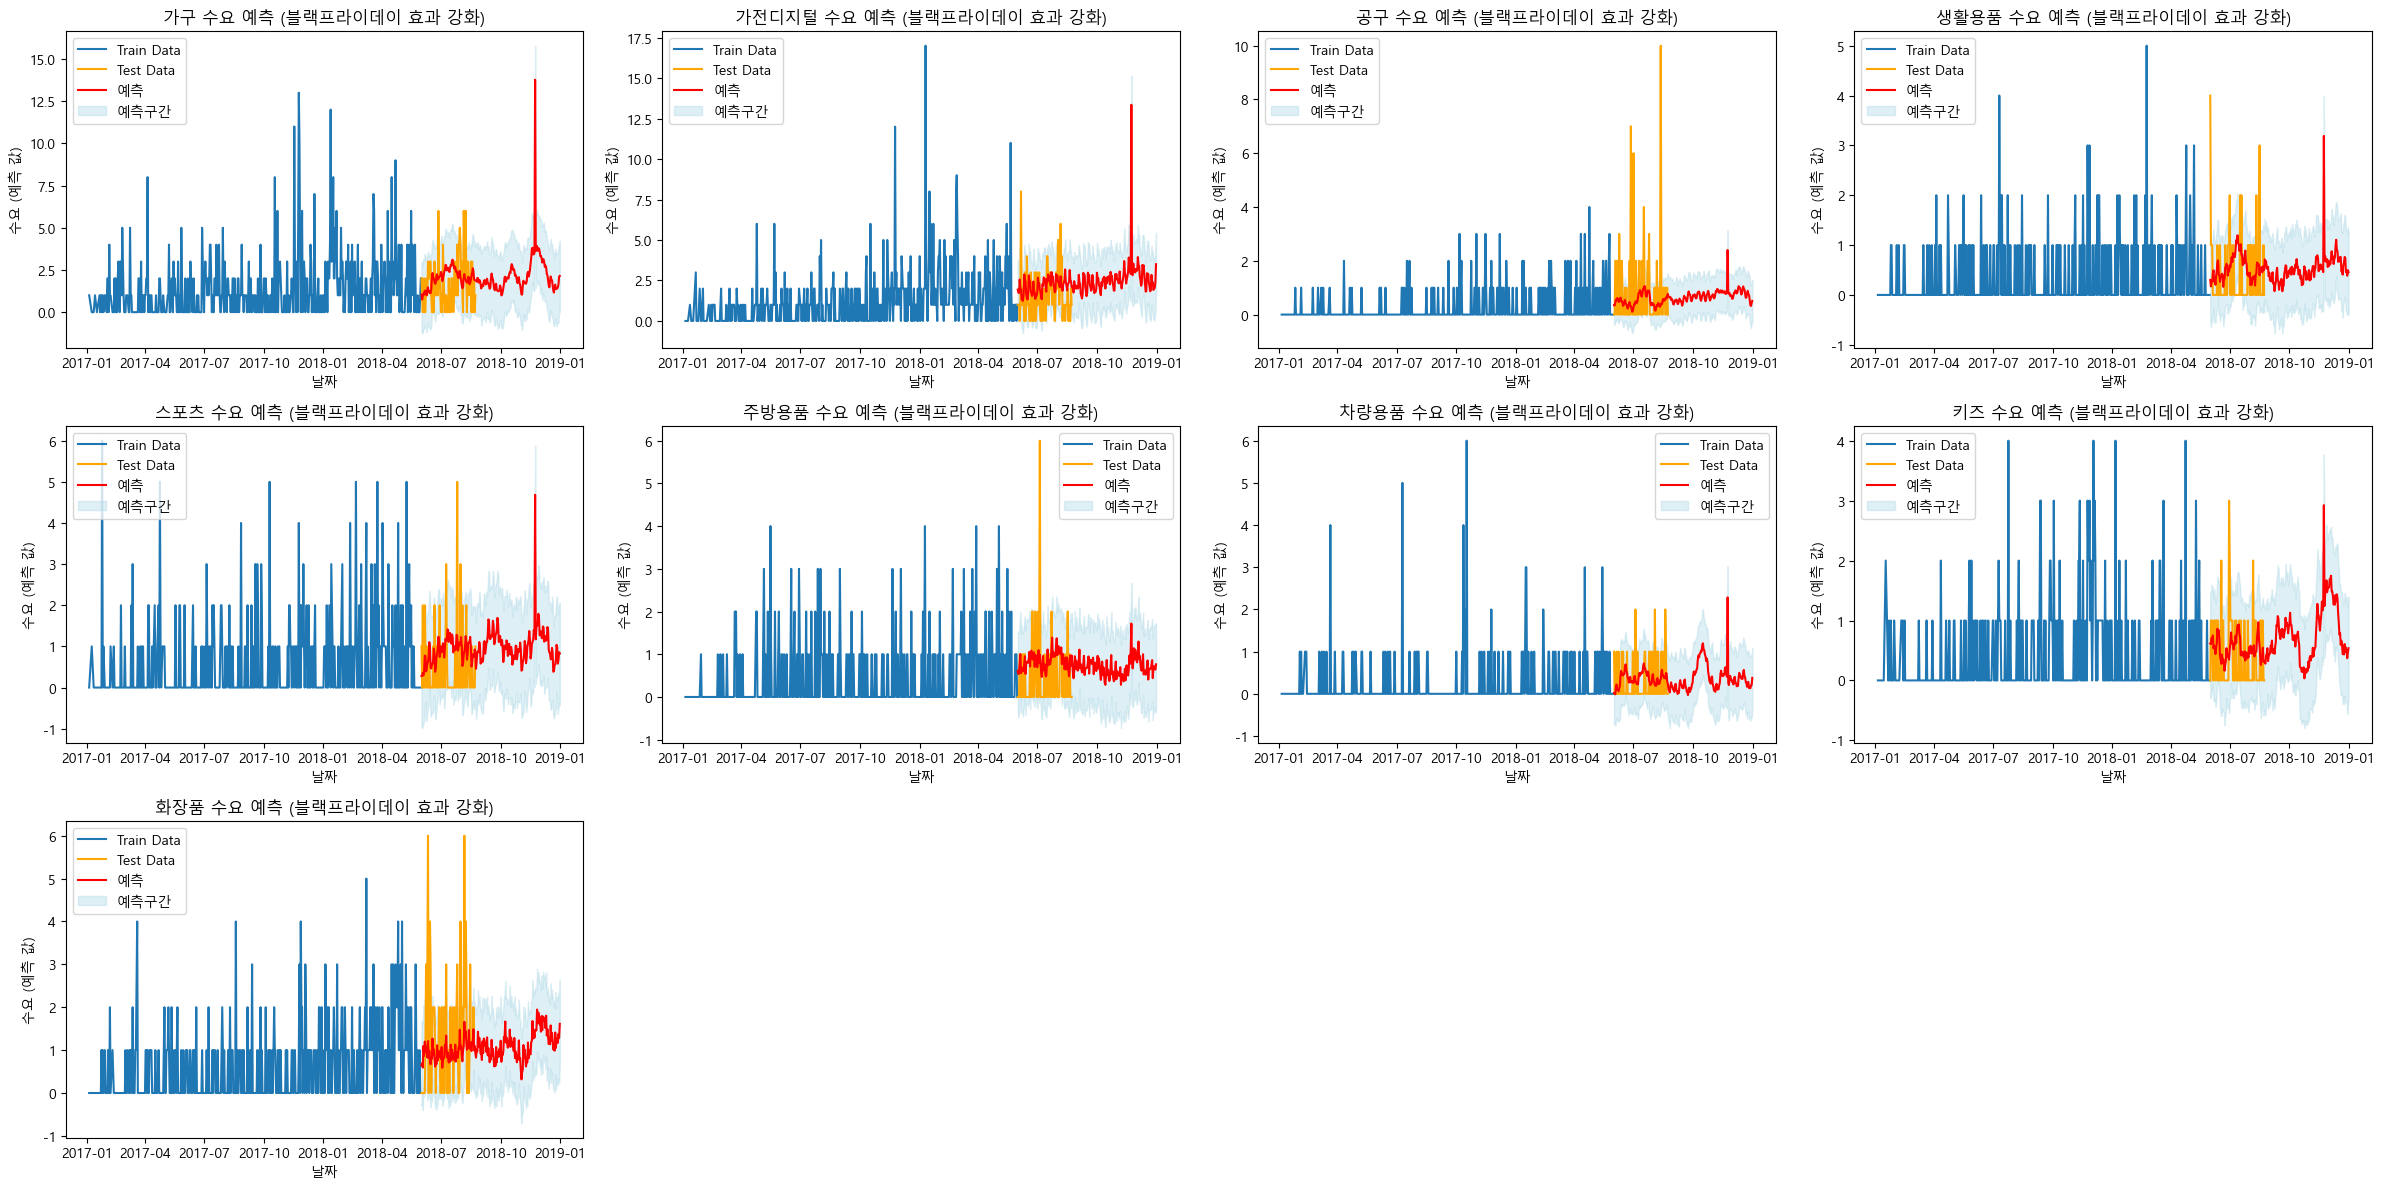

In [18]:
# 시각화를 위한 설정
n_categories = len(categories_to_forecast)
n_rows = math.ceil(n_categories / 4)  # 4열로 구성할 때 필요한 행 개수 계산

plt.figure(figsize=(24, n_rows * 4))  # 그래프 크기 조정

# 각 카테고리에 대해 예측 수행 및 시각화
for i, category in enumerate(categories_to_forecast):
    test_df, forecast_results = forecast_with_prophet(train_data_2, test_data_2, category)
    
    # 시각화 (4열로 배치)
    plt.subplot(n_rows, 4, i + 1)
    plt.plot(train_data_2.index, train_data_2[category], label='Train Data')
    plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')
    plt.plot(forecast_results.index, forecast_results['yhat'], label='예측', color='red')
    plt.fill_between(forecast_results.index, forecast_results['yhat_lower'], forecast_results['yhat_upper'], color='lightblue', alpha=0.4, label='예측구간')
    plt.title(f"{category} 수요 예측 (블랙프라이데이 효과 강화)")
    plt.xlabel("날짜")
    plt.ylabel("수요 (예측 값)")
    plt.legend()

plt.tight_layout()
plt.show()

## cluster3

In [19]:
# 각 카테고리별 주문 수 합계 계산
category_sums = train_data_3.drop(columns=['black_friday']).sum()

# 주문 수가 100개 이상인 카테고리 필터링
categories_to_forecast = category_sums[category_sums >= 100].index.tolist()

# 결과 확인
print("주문 수가 100개 이상인 카테고리:")
print(categories_to_forecast)

주문 수가 100개 이상인 카테고리:
['가구', '가전디지털', '공구', '문구', '반려동물용품', '생활용품', '스포츠', '주방용품', '차량용품', '키즈', '패션', '화장품']


C:\Users\pro_1030\AppData\Local\Temp\ipykernel_14620\1998675734.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['black_friday'].fillna(0, inplace=True)  # 결측치를 0으로 채움
19:47:13 - cmdstanpy - INFO - Chain [1] start processing
19:47:13 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\pro_1030\AppData\Local\Temp\ipykernel_14620\1998675734.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0

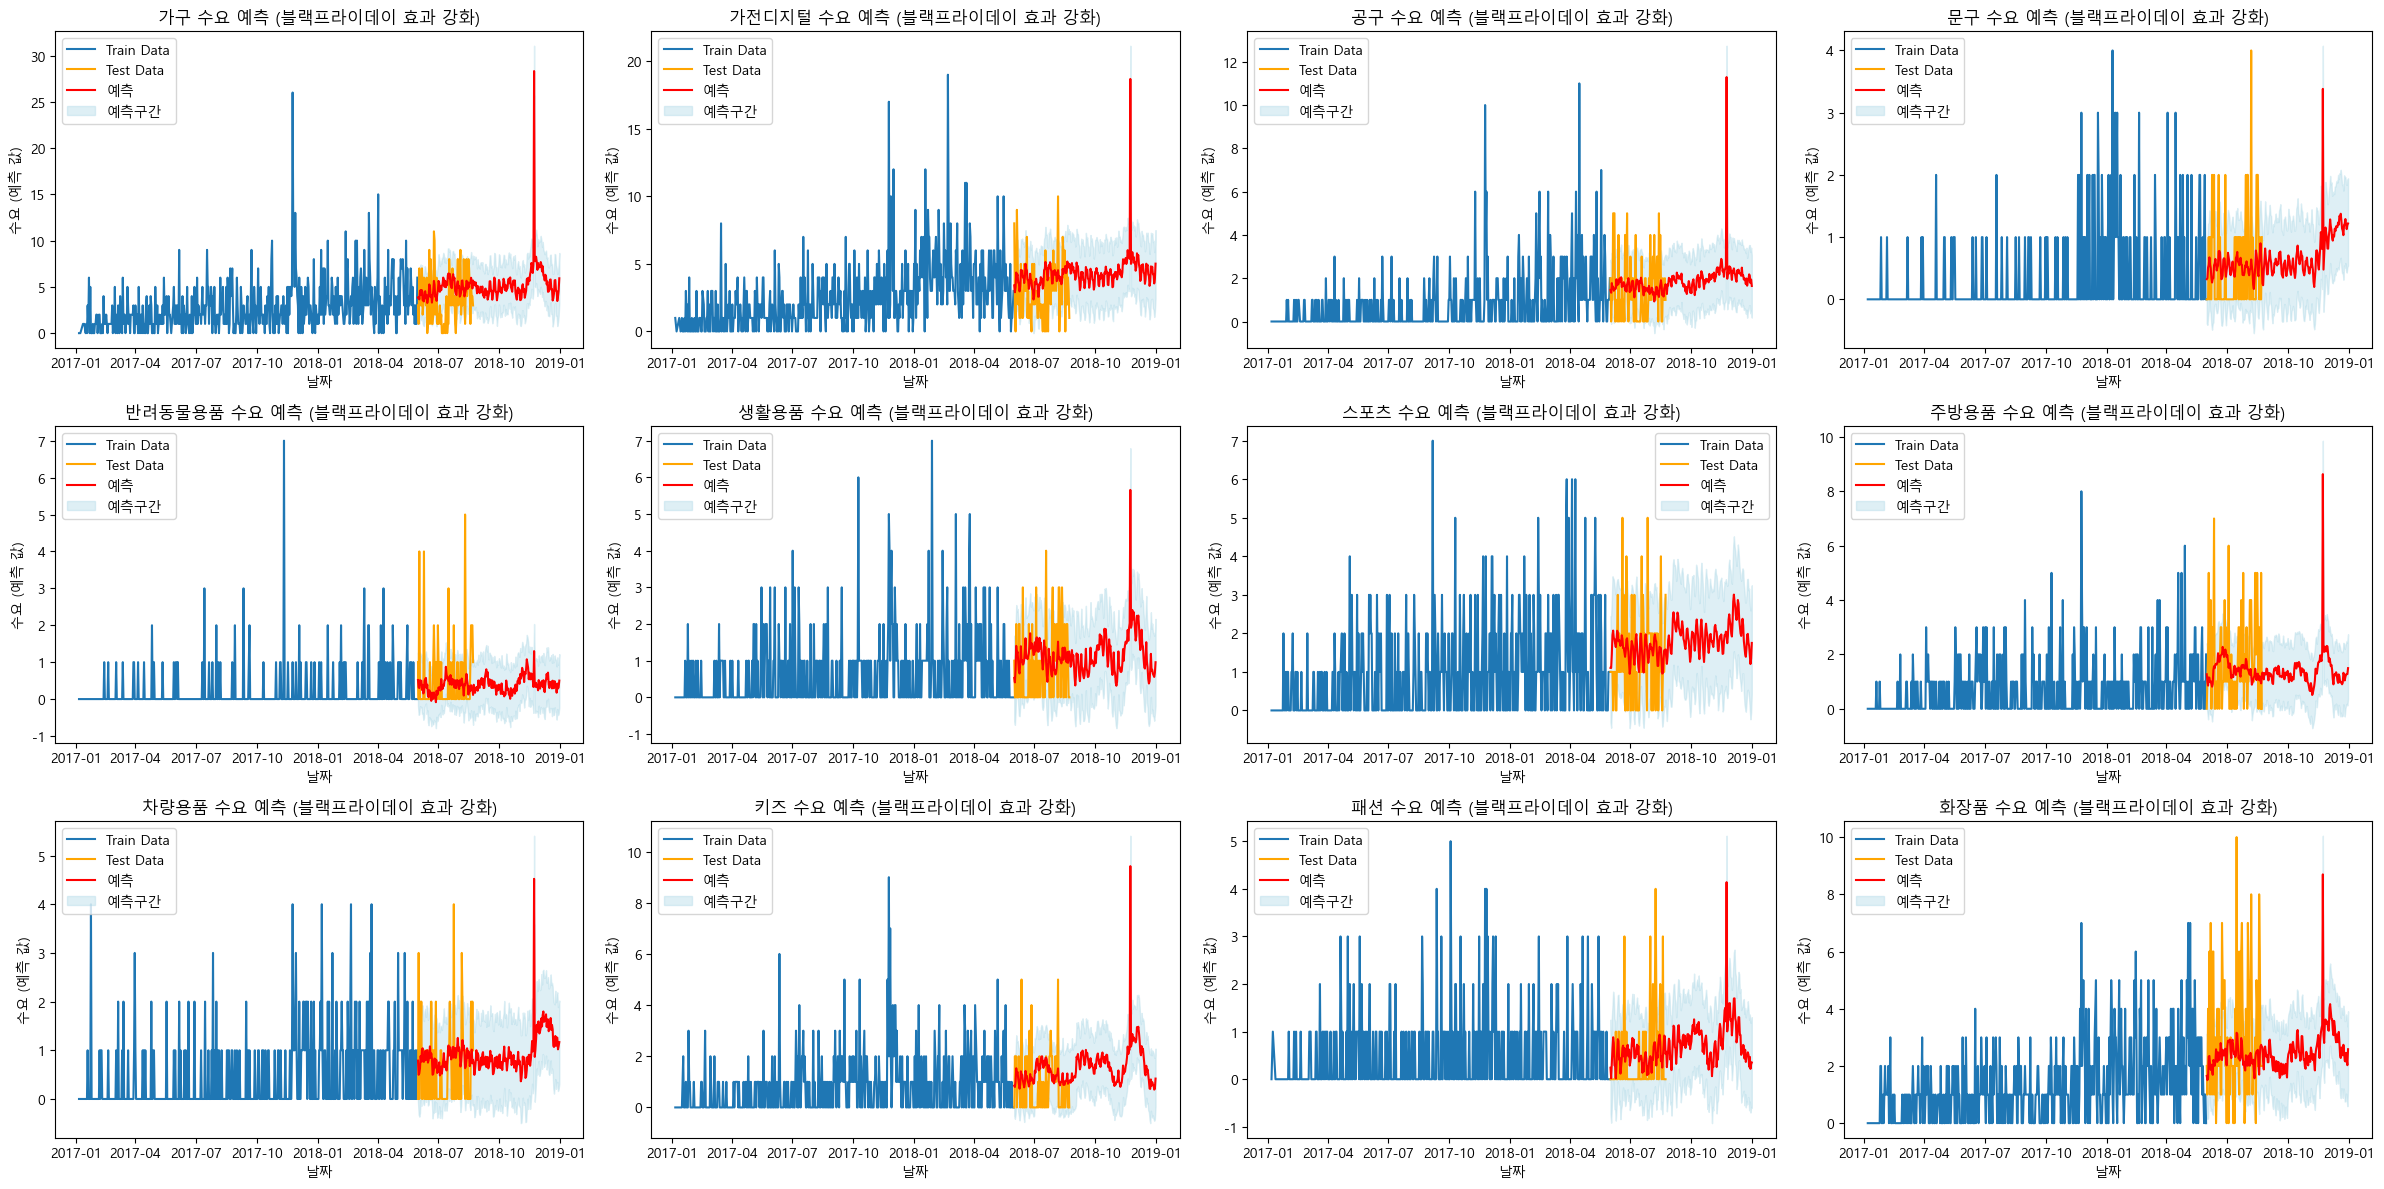

In [20]:
# 시각화를 위한 설정
n_categories = len(categories_to_forecast)
n_rows = math.ceil(n_categories / 4)  # 4열로 구성할 때 필요한 행 개수 계산

plt.figure(figsize=(24, n_rows * 4))  # 그래프 크기 조정

# 각 카테고리에 대해 예측 수행 및 시각화
for i, category in enumerate(categories_to_forecast):
    test_df, forecast_results = forecast_with_prophet(train_data_3, test_data_3, category)
    
    # 시각화 (4열로 배치)
    plt.subplot(n_rows, 4, i + 1)
    plt.plot(train_data_3.index, train_data_3[category], label='Train Data')
    plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')
    plt.plot(forecast_results.index, forecast_results['yhat'], label='예측', color='red')
    plt.fill_between(forecast_results.index, forecast_results['yhat_lower'], forecast_results['yhat_upper'], color='lightblue', alpha=0.4, label='예측구간')
    plt.title(f"{category} 수요 예측 (블랙프라이데이 효과 강화)")
    plt.xlabel("날짜")
    plt.ylabel("수요 (예측 값)")
    plt.legend()

plt.tight_layout()
plt.show()

## cluster4

In [21]:
# 각 카테고리별 주문 수 합계 계산
category_sums = train_data_4.drop(columns=['black_friday']).sum()

# 주문 수가 100개 이상인 카테고리 필터링
categories_to_forecast = category_sums[category_sums >= 100].index.tolist()

# 결과 확인
print("주문 수가 100개 이상인 카테고리:")
print(categories_to_forecast)

주문 수가 100개 이상인 카테고리:
['가구', '가전디지털', '공구', '생활용품', '스포츠', '주방용품', '키즈', '화장품']


C:\Users\pro_1030\AppData\Local\Temp\ipykernel_14620\1998675734.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['black_friday'].fillna(0, inplace=True)  # 결측치를 0으로 채움
19:47:27 - cmdstanpy - INFO - Chain [1] start processing
19:47:27 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\pro_1030\AppData\Local\Temp\ipykernel_14620\1998675734.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0

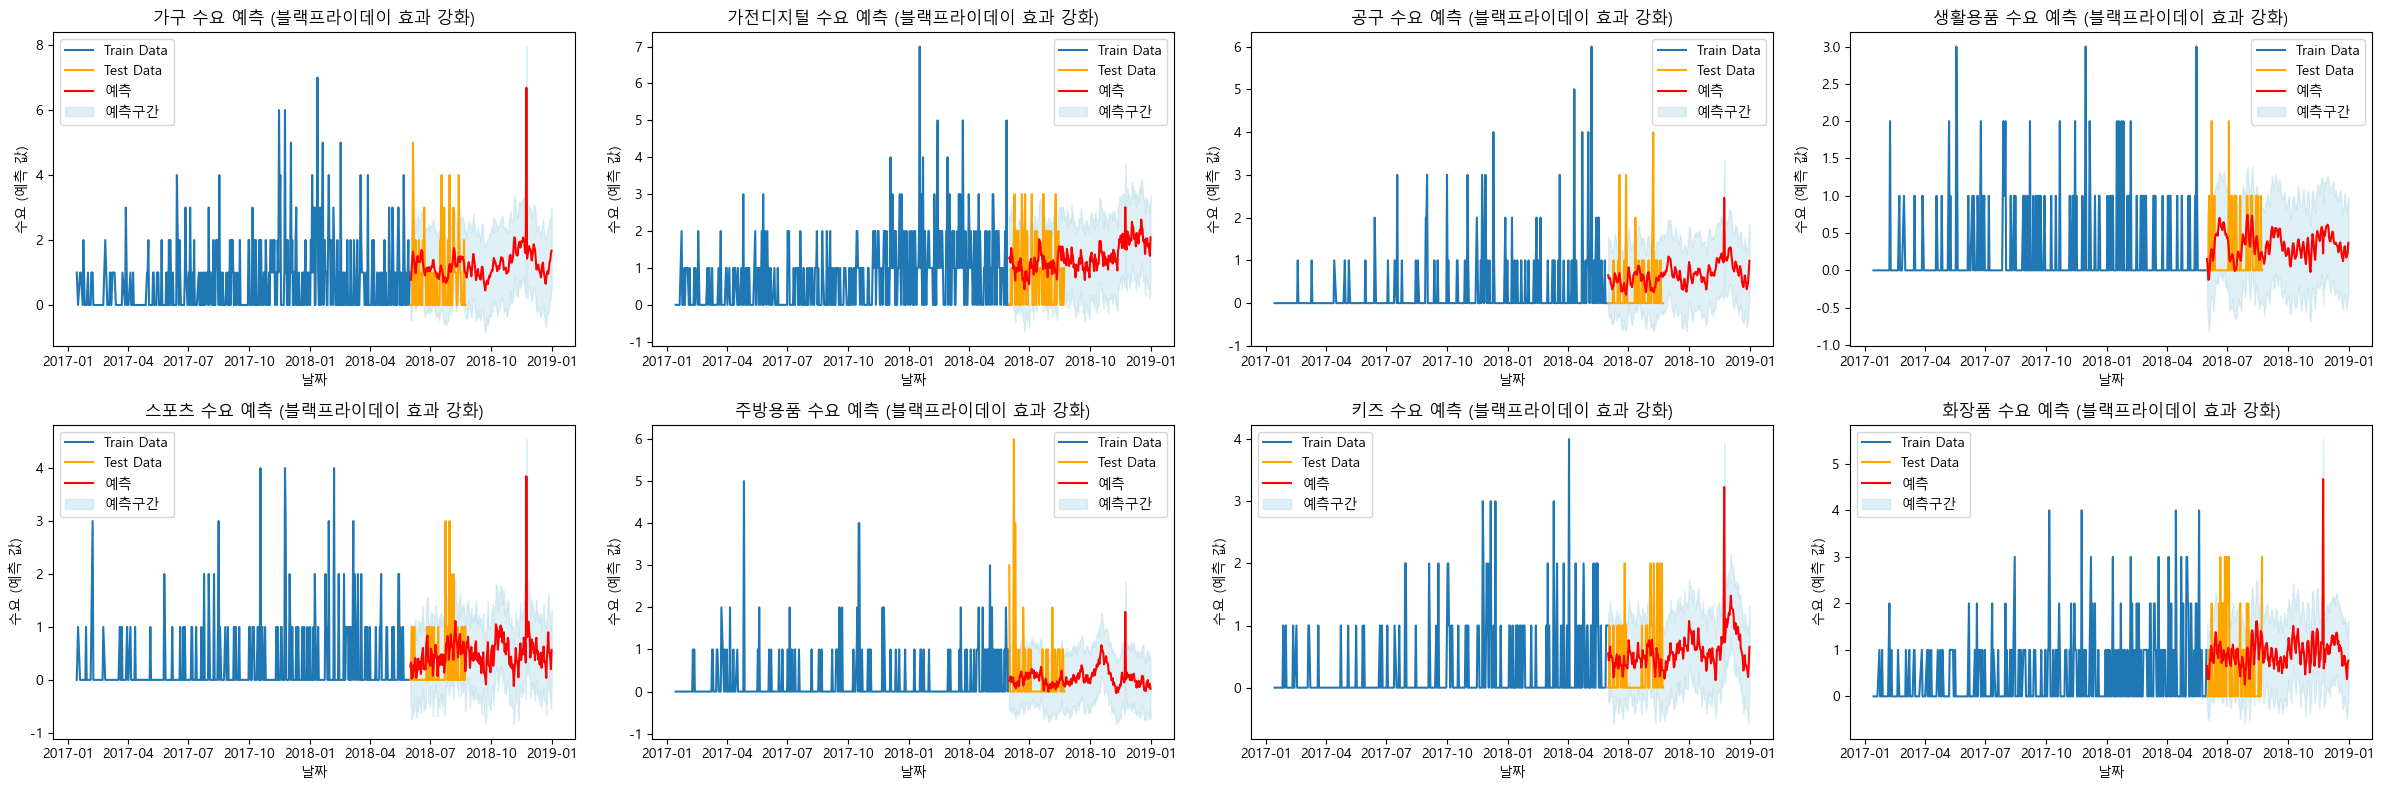

In [22]:
# 시각화를 위한 설정
n_categories = len(categories_to_forecast)
n_rows = math.ceil(n_categories / 4)  # 4열로 구성할 때 필요한 행 개수 계산

plt.figure(figsize=(24, n_rows * 4))  # 그래프 크기 조정

# 각 카테고리에 대해 예측 수행 및 시각화
for i, category in enumerate(categories_to_forecast):
    test_df, forecast_results = forecast_with_prophet(train_data_4, test_data_4, category)
    
    # 시각화 (4열로 배치)
    plt.subplot(n_rows, 4, i + 1)
    plt.plot(train_data_4.index, train_data_4[category], label='Train Data')
    plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')
    plt.plot(forecast_results.index, forecast_results['yhat'], label='예측', color='red')
    plt.fill_between(forecast_results.index, forecast_results['yhat_lower'], forecast_results['yhat_upper'], color='lightblue', alpha=0.4, label='예측구간')
    plt.title(f"{category} 수요 예측 (블랙프라이데이 효과 강화)")
    plt.xlabel("날짜")
    plt.ylabel("수요 (예측 값)")
    plt.legend()

plt.tight_layout()
plt.show()

# 하나씩 출력한 코드

## 1. 가구

가구 카테고리 예측 중...


C:\Users\pro_1030\AppData\Local\Temp\ipykernel_14620\1545833658.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['black_friday'].fillna(0, inplace=True)  # 결측치를 0으로 채움
19:47:41 - cmdstanpy - INFO - Chain [1] start processing
19:47:41 - cmdstanpy - INFO - Chain [1] done processing


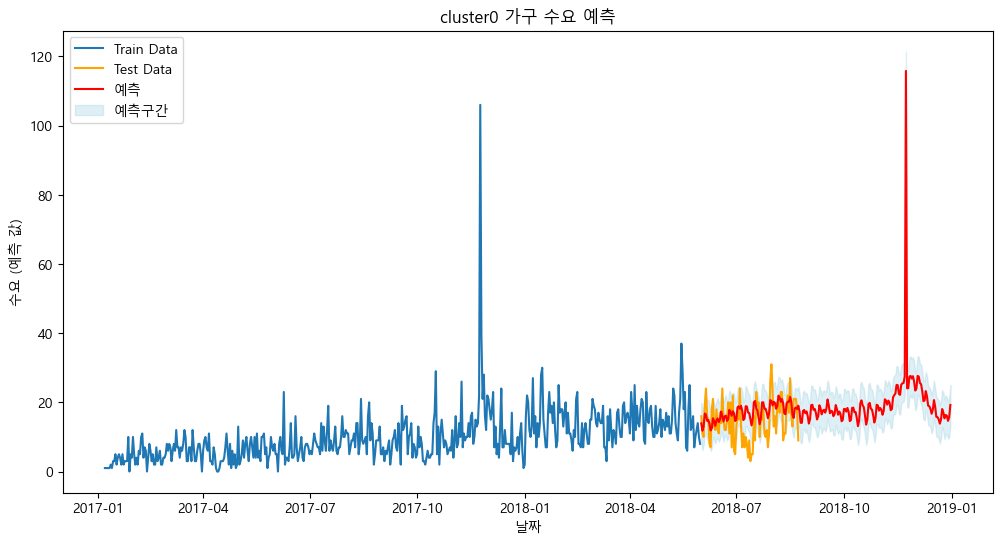

In [23]:
# Prophet 모델을 사용한 수요 예측 및 시각화 함수 정의
def forecast_with_prophet(train_data, test_data, category):
    # train 데이터 준비
    train_df = train_data[[category, 'black_friday']].copy()
    train_df = train_df.rename(columns={category: 'y'}).rename_axis('ds').reset_index()  # Prophet이 요구하는 형식으로 변경

    # test 데이터 준비
    test_df = test_data[[category, 'black_friday']].copy()
    test_df = test_df.rename(columns={category: 'y'}).rename_axis('ds').reset_index()  # Prophet이 요구하는 형식으로 변경
    test_df['black_friday'].fillna(0, inplace=True)  # 결측치를 0으로 채움

    # 블랙프라이데이 주변 며칠에 추가 가중치 부여 (블랙프라이데이 효과 강화)
    black_friday_dates = ['2017-11-24', '2018-11-23']
    train_df['black_friday'] = train_df['ds'].apply(lambda x: 5 if x.strftime('%Y-%m-%d') in black_friday_dates else 0)

    # Prophet 모델 설정 및 학습
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        changepoint_prior_scale=0.05,  # 변화점 민감도 강화
        seasonality_prior_scale=20     # 계절성 반영 강화
    )
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)  # 월별 계절성 추가
    model.add_regressor('black_friday', standardize=False)  # 블랙프라이데이 변수 추가 (표준화 없이 추가)

    # 모델 학습
    model.fit(train_df)

    # 2018년 12월 31일까지 예측을 위한 미래 데이터프레임 생성
    end_date = pd.to_datetime('2018-12-31')
    future_dates = model.make_future_dataframe(periods=(end_date - train_df['ds'].max()).days, freq='D')
    future_dates['black_friday'] = future_dates['ds'].apply(lambda x: 5 if x.strftime('%Y-%m-%d') in black_friday_dates else 0)

    # 예측 수행
    forecast = model.predict(future_dates)
    
    # 예측 결과의 'ds' 열을 유지하여 반환
    forecast.set_index('ds', inplace=True)
    forecast_period = forecast.loc[test_df['ds'].min():end_date]
    
    # 예측 결과 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(train_df['ds'], train_df['y'], label='Train Data')
    plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')
    plt.plot(forecast_period.index, forecast_period['yhat'], label='예측', color='red')
    plt.fill_between(forecast_period.index, forecast_period['yhat_lower'], forecast_period['yhat_upper'], color='lightblue', alpha=0.4, label='예측구간')
    plt.title(f"cluster0 {category} 수요 예측")
    plt.xlabel("날짜")
    plt.ylabel("수요 (예측 값)")
    plt.legend()
    plt.show()

    return forecast[['yhat', 'yhat_lower', 'yhat_upper']]

# 카테고리 선택 (예시로 train_data_0의 첫 번째 카테고리 선택)
category = train_data_0.columns.drop('black_friday')[0]  # 'black_friday' 제외한 첫 번째 카테고리
print(f"{category} 카테고리 예측 중...")

# 예측 수행
forecast_results = forecast_with_prophet(train_data_0, test_data_0, category)

In [24]:
from sklearn.metrics import mean_squared_error

# test 데이터 준비
test_df = test_data_0[[category]].copy()
test_df = test_df.rename(columns={category: 'y'}).rename_axis('ds').reset_index()  # Prophet이 요구하는 형식으로 변경

# 예측 결과와 test 데이터 병합
# 날짜(ds)를 기준으로 test 데이터와 예측 결과를 병합합니다
merged_results = test_df.merge(forecast_results, on='ds', how='inner')

# MSE 계산
mse = mean_squared_error(merged_results['y'], merged_results['yhat'])
print(f"{category} 카테고리의 MSE: {mse}")

가구 카테고리의 MSE: 35.39364157750348


## 2. 가전디지털

가전디지털 카테고리 예측 중...


C:\Users\pro_1030\AppData\Local\Temp\ipykernel_14620\1545833658.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['black_friday'].fillna(0, inplace=True)  # 결측치를 0으로 채움
19:47:50 - cmdstanpy - INFO - Chain [1] start processing
19:47:50 - cmdstanpy - INFO - Chain [1] done processing


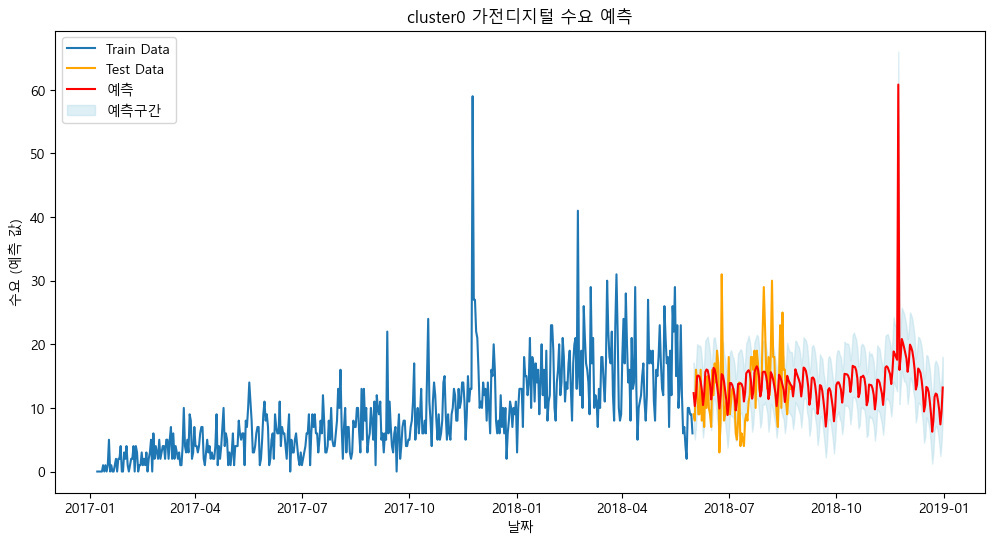

In [26]:
# 카테고리 선택 (예시로 train_data_0의 첫 번째 카테고리 선택)
category = train_data_0.columns.drop('black_friday')[1]  # 'black_friday' 제외한 첫 번째 카테고리
print(f"{category} 카테고리 예측 중...")

# 예측 수행
forecast_results = forecast_with_prophet(train_data_0, test_data_0, category)


In [27]:
# test 데이터 준비
test_df = test_data_0[[category]].copy()
test_df = test_df.rename(columns={category: 'y'}).rename_axis('ds').reset_index()  # Prophet이 요구하는 형식으로 변경

# 예측 결과와 test 데이터 병합
# 날짜(ds)를 기준으로 test 데이터와 예측 결과를 병합합니다
merged_results = test_df.merge(forecast_results, on='ds', how='inner')

# MSE 계산
mse = mean_squared_error(merged_results['y'], merged_results['yhat'])
print(f"{category} 카테고리의 MSE: {mse}")

가전디지털 카테고리의 MSE: 27.937390248626052


# 클러스터별 예측 특징

In [28]:
from prophet import Prophet

# Prophet 모델을 사용한 수요 예측 함수 (그래프 생성을 제외하고 예측 값만 반환)
def forecast_with_prophet(train_data, test_data, category):
    # train 데이터 준비
    train_df = train_data[[category, 'black_friday']].copy()
    train_df = train_df.rename(columns={category: 'y'}).rename_axis('ds').reset_index()  # Prophet이 요구하는 형식으로 변경

    # 블랙프라이데이 주변 며칠에 추가 가중치 부여 (블랙프라이데이 효과 강화)
    black_friday_dates = ['2017-11-24', '2018-11-23']
    train_df['black_friday'] = train_df['ds'].apply(lambda x: 5 if x.strftime('%Y-%m-%d') in black_friday_dates else 0)

    # Prophet 모델 설정 및 학습
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        changepoint_prior_scale=0.05,  # 변화점 민감도 강화
        seasonality_prior_scale=20     # 계절성 반영 강화
    )
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)  # 월별 계절성 추가
    model.add_regressor('black_friday', standardize=False)  # 블랙프라이데이 변수 추가 (표준화 없이 추가)

    # 모델 학습
    model.fit(train_df)

    # 2018년 12월 31일까지 예측을 위한 미래 데이터프레임 생성
    end_date = pd.to_datetime('2018-12-31')
    future_dates = model.make_future_dataframe(periods=(end_date - train_df['ds'].max()).days, freq='D')
    future_dates['black_friday'] = future_dates['ds'].apply(lambda x: 5 if x.strftime('%Y-%m-%d') in black_friday_dates else 0)

    # 예측 수행
    forecast = model.predict(future_dates)
    
    # 예측 결과 반환 (그래프 생성 없음)
    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

19:48:02 - cmdstanpy - INFO - Chain [1] start processing
19:48:02 - cmdstanpy - INFO - Chain [1] done processing
19:48:03 - cmdstanpy - INFO - Chain [1] start processing
19:48:03 - cmdstanpy - INFO - Chain [1] done processing
19:48:03 - cmdstanpy - INFO - Chain [1] start processing
19:48:03 - cmdstanpy - INFO - Chain [1] done processing
19:48:04 - cmdstanpy - INFO - Chain [1] start processing
19:48:04 - cmdstanpy - INFO - Chain [1] done processing
19:48:04 - cmdstanpy - INFO - Chain [1] start processing
19:48:04 - cmdstanpy - INFO - Chain [1] done processing
19:48:05 - cmdstanpy - INFO - Chain [1] start processing
19:48:05 - cmdstanpy - INFO - Chain [1] done processing
19:48:05 - cmdstanpy - INFO - Chain [1] start processing
19:48:05 - cmdstanpy - INFO - Chain [1] done processing
19:48:05 - cmdstanpy - INFO - Chain [1] start processing
19:48:06 - cmdstanpy - INFO - Chain [1] done processing
19:48:06 - cmdstanpy - INFO - Chain [1] start processing
19:48:06 - cmdstanpy - INFO - Chain [1]

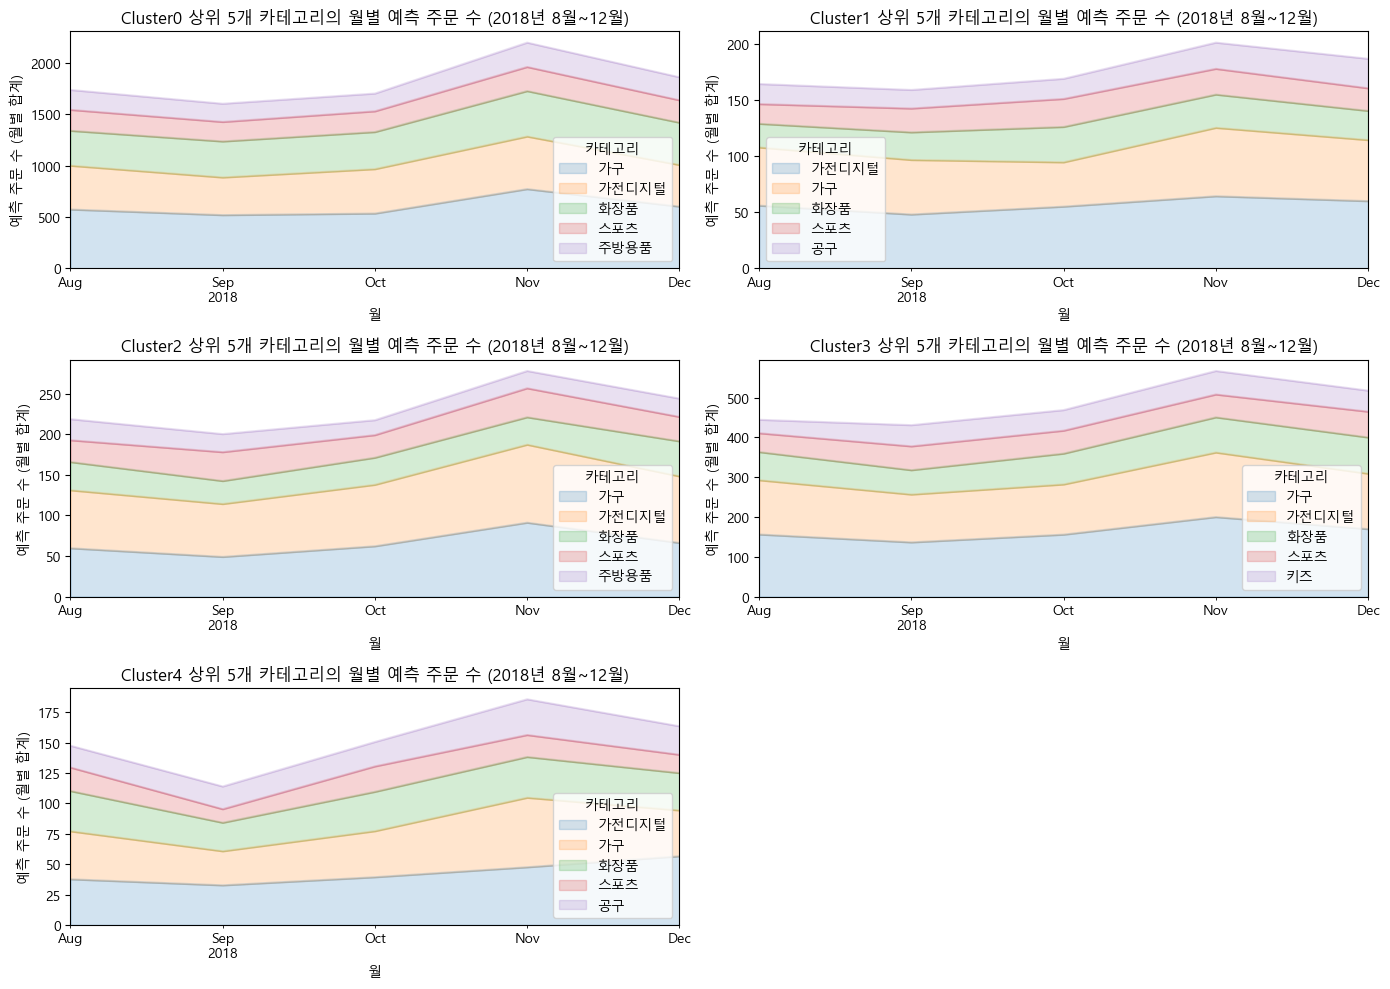

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 각 클러스터별 상위 5개 카테고리에 대한 월별 누적 면적 그래프를 그리기 위한 데이터 준비
clusters_train = [train_data_0, train_data_1, train_data_2, train_data_3, train_data_4]  # 각 클러스터의 train 데이터
clusters_test = [test_data_0, test_data_1, test_data_2, test_data_3, test_data_4]  # 각 클러스터의 test 데이터
cluster_names = ['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4']
monthly_forecast_by_cluster = {}

for i, (train_data, test_data) in enumerate(zip(clusters_train, clusters_test)):
    # 각 클러스터에서 상위 5개 카테고리 선택
    top_5_categories = train_data.sum().sort_values(ascending=False).head(5).index
    
    # 각 카테고리에 대해 예측 데이터를 사용하여 월별 합계 계산
    monthly_forecast = pd.DataFrame()
    for category in top_5_categories:
        
        # 예측 수행
        forecast_results = forecast_with_prophet(train_data, test_data, category)
        
        # 인덱스를 datetime 형식으로 변환하여 날짜와 비교할 수 있도록 설정
        forecast_results['ds'] = pd.to_datetime(forecast_results['ds'])
        forecast_results.set_index('ds', inplace=True)
        
        # 2018년 8월부터 12월까지 예측 데이터 필터링 및 월별 합계 계산
        forecast_results = forecast_results[(forecast_results.index >= '2018-08-01') & (forecast_results.index <= '2018-12-31')]
        forecast_results['month'] = forecast_results.index.to_period('M')
        forecast_monthly = forecast_results.groupby('month')['yhat'].sum()
        
        # 결과 저장
        monthly_forecast[category] = forecast_monthly

    # 데이터 저장
    monthly_forecast_by_cluster[cluster_names[i]] = monthly_forecast

# 그래프 시각화
plt.figure(figsize=(14, 10))
for i, (cluster_name, monthly_forecast) in enumerate(monthly_forecast_by_cluster.items()):
    plt.subplot(3, 2, i + 1)  # 5개의 클러스터를 3x2 그리드로 표시
    monthly_forecast.plot.area(ax=plt.gca(), alpha=0.2)
    plt.title(f"{cluster_name} 상위 5개 카테고리의 월별 예측 주문 수 (2018년 8월~12월)")
    plt.xlabel("월")
    plt.ylabel("예측 주문 수 (월별 합계)")
    plt.legend(title="카테고리")

plt.tight_layout()
plt.show()